## 0. Librairies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
import plotly.express as px 

## 0. Paramétrage

In [4]:
## variables servant à créer le sous dataset lié à la position et lancer tous le process
## Une fois le paramétrage effectué, il suffit de faire tourner tout le notebook
## Sortie : 2 fichier excel
# 1. un fichier excel avec tous les joueurs de la position, une colonne de labelisation du cluster, les colonnes des composantes
# 2. un fichier excel avec la matrice de distance entre les pairs de joueurs (distance euclidienne dans l'espace des composantes principales)

position = 'Ai' # mettre les initiales de la position
position_denomination_OG = 'Défenseur latéral' # utiliser la dénomination de la position telle qu'elle est écrite dans la colonne 'Position Générale'
nombre_cluster = 3

## 1. Préparation des datasets

In [5]:
# Dataset source: fichier consolidé whyscout + football manager, avec dedoublonnage sur nom+équipe

dataset = pd.read_csv("dataset/data_consolidee/datavf_dedupliqueeV2 (1).csv", index_col = 0 ) 

In [6]:
dataset.head()

,Joueur,Équipe,Position Générale Jointure WS,Position Générale,Position Détaillée,Position détaillée 1_x,Position détaillée 2_x,Position détaillée 3_x,Âge,Valeur marchande,Fin de contrat,Matchs joués,Minutes jouées,Buts,xG,Passes décisives,xA,Duels par 90,"Duels gagnés, %",Pays de naissance,Passeport pays,Pied,Taille,Poids,Prêté,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes,Cartons jaunes par 90,Cartons rouges,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Buts concédés,Buts concédés par 90,Tirs concédés,Tirs concédés par 90,Cages inviolées,"Enregistrer, %",xG contre,xG contre par 90,Buts évités,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Position Générale Jointure,Position Générale y,Position détaillée 1_y,Position détaillée 2_y,Position détaillée 3_y,Position détaillée 4,Position détaillée 5,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,InjuryPronessReverse,Name_encoded,Age_encoded,id_poste,Efficacité Gardien,Efficacité Passeur,Implication Passe Décisive par 90,Efficacité Buteur,But concédé par tirs contre par 90,Intelligence de jeu,Capac

In [7]:
dataset.shape

(1504, 227)

In [8]:
# Créer une colonne d'identifiant pour les joueurs
dataset.insert(0, "id_joueur", dataset.index) 
dataset.shape

(1504, 228)

In [9]:
dataset.head()

,id_joueur,Joueur,Équipe,Position Générale Jointure WS,Position Générale,Position Détaillée,Position détaillée 1_x,Position détaillée 2_x,Position détaillée 3_x,Âge,Valeur marchande,Fin de contrat,Matchs joués,Minutes jouées,Buts,xG,Passes décisives,xA,Duels par 90,"Duels gagnés, %",Pays de naissance,Passeport pays,Pied,Taille,Poids,Prêté,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes,Cartons jaunes par 90,Cartons rouges,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Buts concédés,Buts concédés par 90,Tirs concédés,Tirs concédés par 90,Cages inviolées,"Enregistrer, %",xG contre,xG contre par 90,Buts évités,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Position Générale Jointure,Position Générale y,Position détaillée 1_y,Position détaillée 2_y,Position détaillée 3_y,Position détaillée 4,Position détaillée 5,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,TendencyToPunch,Throwing,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,LongShots,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Acceleration,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,InjuryPronessReverse,Name_encoded,Age_encoded,id_poste,Efficacité Gardien,Efficacité Passeur,Implication Passe Décisive par 90,Efficacité Buteur,But concédé par tirs contre par 90,Intelligence de

## Construire un sous dataset pour la position de jeu

In [10]:
# Spécifier l'ensemble des colonnes des joueurs de champs issues du dataset whyscout

colonnes_ws = ['id_joueur','Joueur','Équipe', 'Position Générale','Position Générale Jointure WS', 'Position détaillée 1_x','Âge', 'Valeur marchande',
                      'Matchs joués', 'Minutes jouées', 'Buts', 'Passes décisives', 'Duels par 90',
'Duels gagnés, %', 'Pied', 'Taille', 'Poids', 'Actions défensives réussies par 90', 'Duels défensifs par 90',
'Duels défensifs gagnés, %', 'Duels aériens par 90', 'Duels aériens gagnés, %', 'Tacles glissés par 90', 'Tacles glissés PAdj',
'Tirs bloqués par 90', 'Interceptions par 90', 'Interceptions PAdj', 'Fautes par 90', 'Cartons jaunes par 90',
'Cartons rouges par 90', 'Attaques réussies par 90', 'Buts par 90', 'Buts hors penalty par 90', 'xG par 90',
'Buts de la tête', 'Buts de la tête par 90', 'Tirs par 90', 'Tirs à la cible, %', 'Taux de conversion but/tir',
'Passes décisives par 90', 'Centres par 90', 'Сentres précises, %', 'Centres du flanc gauche par 90',
'Centres du flanc gauche précises, %', 'Centres du flanc droit par 90', 'Centres du flanc droit précises, %',
'Centres dans la surface de but par 90', 'Dribbles par 90', 'Dribbles réussis, %', 'Duels offensifs par 90',
'Duels de marquage, %', 'Touches de balle dans la surface de réparation sur 90', 'Courses progressives par 90',
'Accélérations par 90', 'Passes réceptionnées par 90', 'Longues passes réceptionnées par 90',
'Fautes subies par 90', 'Passes par 90', 'Passes précises, %', 'Passes avant par 90', 'Passes en avant précises, %',
'Passes arrière par 90', 'Passes arrière précises, %', 'Passes latérales par 90', 'Passes latérales précises, %',
'Passes courtes / moyennes par 90', 'Passes courtes / moyennes précises, %', 'Passes longues par 90',
'Longues passes précises, %', 'Longueur moyenne des passes (en m)', 'Longueur moyenne des passes longues (en m)',
'xA par 90', 'Passes décisives avec tir par 90', 'Secondes passes décisives par 90',
'Troisièmes passes décisives par 90', 'Passes judicieuses par 90', 'Passes intelligentes précises, %',
'Passes quasi décisives par 90', 'Passes dans tiers adverse par 90', 'Passes dans tiers adverse précises, %',
'Passes vers la surface de réparation par 90', 'Passes vers la surface de réparation précises, %',
'Passes pénétrantes par 90', 'Passes en profondeur précises, %', 'Réalisations en profondeur par 90',
'Centres en profondeur, par 90', 'Passes progressives par 90', 'Passes progressives précises, %',
'Passes arrière au gardien de but par 90', 'Coups francs par 90', 'Coups francs directs par 90',
'Coups francs directs à la cible, %', 'Corners par 90', 'Penalties pris', 'Transformation des penalties, %', 
]

In [11]:
len(colonnes_ws)

95

In [12]:
# Spécifier l'ensemble des colonnes des joueurs de champs (JC) issues du dataset football manager

colonne_que_Gardien_fm = ['AerialAbility','CommandOfArea','Communication','Eccentricity','Handling','Kicking',
             'OneOnOnes','Reflexes','RushingOut','TendencyToPunch','Throwing']

colonnes_fm = ['UID', 'Name', 'Born', 'Age', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Agility', 'Balance', 'Jumping',
       'NaturalFitness', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryPronessReverse', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional', 'Sportsmanship', 'Temperament',
       'Controversy', 'PositionsDesc', 'Goalkeeper', 'Sweeper', 'Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight',
       'DefensiveMidfielder', 'MidfielderCentral', 'MidfielderLeft',
       'MidfielderRight', 'WingBackLeft', 'WingBackRight'
]


colonne_JC_fm = [x for x in colonnes_fm if x not in colonne_que_Gardien_fm] 
print(colonne_JC_fm)

['UID', 'Name', 'Born', 'Age', 'Height', 'Weight', 'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions', 'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning', 'Teamwork', 'Workrate', 'Agility', 'Balance', 'Jumping', 'NaturalFitness', 'Stamina', 'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches', 'InjuryPronessReverse', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure', 'Professional', 'Sportsmanship', 'Temperament', 'Controversy', 'PositionsDesc', 'Goalkeeper', 'Sweeper', 'Striker', 'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight', 'DefenderCentral', 'DefenderLeft', 'DefenderRight', 'DefensiveMidfielder', 'MidfielderCentral', 'MidfielderLeft', 'MidfielderRight', 'WingBackLeft', 'WingBackRight']


In [13]:
len(colonne_JC_fm)

55

In [14]:
colonnes_totale_poste = colonnes_ws + colonne_JC_fm

In [15]:
type(colonnes_totale_poste)

list

In [16]:
data_inter = dataset.loc[:, colonnes_totale_poste]
data_inter.shape

(1504, 150)

In [17]:
# selectionner les lignes correspondant au poste
#data_inter['id_poste'] = data_inter['Position détaillée 1_x'].apply(lambda x : position_denomination_OG in x)
#data_inter['id_poste'] = data_inter['Position Générale'].apply(lambda x : position_denomination_OG in x)

'''

data_inter['id_poste'] = data_inter['Position Générale'].apply(lambda x : x == 'Milieu relayeur' 
                                                               or x == 'Milieu relayeur, Milieu défensif'
                                                               or x == 'Milieu relayeur, Milieu offensif'
                                                               or x == 'Milieu relayeur, Défenseur latéral'
                                                               or x == 'Milieu relayeur, Avant-Centre'
                                                               or x == 'Milieu relayeur, Défenseur latéral, Milieu défensif'
                                                               or x == 'Milieu relayeur, Ailier'
                                                               or x == 'Milieu relayeur, Milieu offensif, Ailier'
                                                               or x == 'Milieu relayeur, Défenseur central, Milieu défensif'
                                                               or x == 'Milieu relayeur, Défenseur central'

                                                              )


data_inter['id_poste'] = data_inter['Position Générale'].apply(lambda x : x == 'Milieu offensif' 
                                                               or x == 'Milieu offensif, Ailier'
                                                               or x == 'Milieu offensif, Milieu relayeur'
                                                               or x == 'Milieu offensif, Avant-Centre'
                                                               or x == 'Milieu offensif, Défenseur latéral'
                                                               or x == 'Milieu offensif, Avant-Centre, Ailier'
                                                               or x == 'Milieu offensif, Ailier, Avant-Centre'
                                                               or x == 'Milieu offensif, Ailier, Milieu relayeur'
                                                               or x == 'Milieu offensif, Défenseur latéral, Ailier' 
                                                               or x == 'Milieu offensif, Milieu relayeur, Avant-Centre'
                                                               or x == 'Milieu offensif, Défenseur latéral, Milieu relayeur'
                                                               or x == 'Milieu offensif, Milieu défensif, Milieu relayeur'
                                                               or x == 'Milieu offensif, Milieu relayeur, Ailier'
                                                               or x == 'Milieu offensif, Ailier, Défenseur latéral'
                                                              )
         '''                                                       

data_inter['id_poste'] = data_inter['Position Générale'].apply(lambda x : x == 'Ailier' 
                                                                or x == 'Ailier, Milieu offensif'
                                                                or x == 'Ailier, Avant-Centre'
                                                                or x == 'Ailier, Défenseur latéral, Milieu offensif'
                                                                or x == 'Ailier, Défenseur latéral'
                                                                or x == 'Ailier, Milieu défensif, Milieu relayeur'
                                                                or x == 'Ailier, Milieu défensif'
                                                                or x == 'Ailier, Milieu offensif, Milieu relayeur'
                                                                or x == 'Ailier, Milieu offensif, Avant-Centre'
                                                                or x == 'Ailier, Avant-Centre, Milieu offensif'
                                                                or x == 'Ailier, Milieu relayeur'
                                                               
                                                              )






In [18]:
mask = (data_inter['id_poste'] == True)
dataset_poste = data_inter.loc[mask,]
dataset_poste.drop('id_poste', axis=1, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
len(dataset_poste)

79

dataset_gardien.isnull().sum()

In [20]:
# remettre l'index à zero

dataset_poste.reset_index(inplace = True, drop=True)

## 2. Reduction de dimension

In [21]:
# selectionner les colonnes quanti
df_poste = dataset_poste.select_dtypes([np.number])

In [22]:
# calculer la matrice de corrélation
corr = df_poste.corr()

In [23]:
# Sortir les correlations deux par deux et les trier
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
#print(sorted_pairs)

In [24]:
# pour les colonnes très corrélées (au delà de 90%), ne garder qu'une des deux 

high_corr = abs(corr) > 0.9
high_corr_list = [(i,j) for i in range(corr.shape[0]) for j in range(corr.shape[0]) if i != j and high_corr.iloc[i,j]]

In [25]:
col_a_ignorer = set([couple[0] for couple in high_corr_list])
col_a_garder = [i for i in range(df_poste.shape[1]) if i not in col_a_ignorer]

In [26]:
len(col_a_garder), len(col_a_ignorer)

(123, 18)

In [27]:
df_poste_pca = df_poste.iloc[:,col_a_garder]

In [28]:
len(df_poste_pca)

79

In [29]:
# Normaliser les variables

from sklearn.preprocessing import StandardScaler

# instancier la classe
sc = StandardScaler()

# appliquer la standardisation
df_poste_pca_std = sc.fit_transform(df_poste_pca)

In [30]:
# Lancer la pca

from sklearn.decomposition import PCA

# instancier une analyse en composante principale : voir combien de variables embarquent 80% de variance
pca = PCA(n_components = 0.8)

# Lancer l'apprentissage 
PC = pca.fit_transform(df_poste_pca_std)

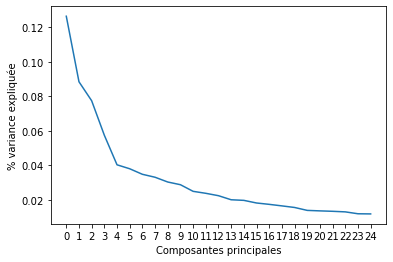

In [31]:
# visualiser le 'screeplot' pour voir le nombre de composante à prendre

plt.plot(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('% variance expliquée')
plt.xticks(range(pca.n_components_))
plt.show()

In [32]:
# %variance cumulée par composante
pca.explained_variance_ratio_.cumsum()

array([0.12637359, 0.21474529, 0.29211076, 0.3494697 , 0.38968429,
       0.42760729, 0.46231751, 0.49531736, 0.52555665, 0.55422752,
       0.57905651, 0.60274197, 0.62504296, 0.64498638, 0.66458152,
       0.68265185, 0.69993216, 0.7163235 , 0.73179572, 0.74557451,
       0.75906953, 0.77231957, 0.78524089, 0.7970624 , 0.80879618])

In [33]:
# instancier une acp
pca2 = PCA(n_components = 7)

# Lancer l'apprentissage 
PC_bis = pca2.fit_transform(df_poste_pca_std)

In [34]:
# vérifier le %variance cumulée pour les 5 composantes
pca2.explained_variance_ratio_.cumsum()

array([0.12637359, 0.21474529, 0.29211076, 0.3494697 , 0.38968429,
       0.42760729, 0.46231751])

In [35]:
# voir le %variance expliquée par chaque composante
pca2.explained_variance_ratio_

array([0.12637359, 0.0883717 , 0.07736547, 0.05735894, 0.04021459,
       0.037923  , 0.03471021])

## 3. Analyse de chaque composante principale

In [36]:
# composante 1
loading1 = pd.Series(pca2.components_[0, :], index = df_poste_pca.columns )
loading1.sort_values(ascending = False)

Passes vers la surface de réparation par 90              0.186098
Réalisations en profondeur par 90                        0.178670
Passes quasi décisives par 90                            0.174026
xA par 90                                                0.171716
Passes décisives avec tir par 90                         0.169331
Agility                                                  0.159424
ImportantMatches                                         0.155451
Passes progressives par 90                               0.152005
Passes progressives précises, %                          0.149433
Flair                                                    0.146889
Passes judicieuses par 90                                0.145245
Passes décisives                                         0.144914
Ambition                                                 0.141205
Passes décisives par 90                                  0.138765
Passes arrière par 90                                    0.132922
Passes pén

In [37]:
# composante 2
loading2 = pd.Series(pca2.components_[1, :], index = df_poste_pca.columns )
loading2.sort_values(ascending = False)

Dribbles par 90                                          0.198569
Attaques réussies par 90                                 0.196332
Courses progressives par 90                              0.185895
Duels offensifs par 90                                   0.168673
Centres en profondeur, par 90                            0.155515
Accélérations par 90                                     0.140808
Centres par 90                                           0.134986
Passes progressives précises, %                          0.124425
Passes arrière par 90                                    0.111829
Passes décisives avec tir par 90                         0.111076
Centres dans la surface de but par 90                    0.108715
Centres du flanc gauche par 90                           0.105434
Passes quasi décisives par 90                            0.104906
xA par 90                                                0.102438
Passes arrière précises, %                               0.096437
Passes dan

In [38]:
# composante 3
loading3 = pd.Series(pca2.components_[2, :], index = df_poste_pca.columns )
loading3.sort_values(ascending = False)

Passes dans tiers adverse par 90                         0.250051
Passes avant par 90                                      0.229914
Passes longues par 90                                    0.210399
Passes progressives par 90                               0.207103
Coups francs par 90                                      0.182684
MidfielderCentral                                        0.178144
Corners par 90                                           0.167145
Longueur moyenne des passes longues (en m)               0.158948
Actions défensives réussies par 90                       0.146648
Dirtiness                                                0.145916
Vision                                                   0.128132
Passes décisives avec tir par 90                         0.128031
Passes pénétrantes par 90                                0.125738
DefensiveMidfielder                                      0.121986
Duels défensifs par 90                                   0.118051
Longueur m

In [39]:
# composante 4
loading4 = pd.Series(pca2.components_[3, :], index = df_poste_pca.columns )
loading4.sort_values(ascending = False)

Centres par 90                                           0.250909
Centres du flanc droit par 90                            0.228036
Centres dans la surface de but par 90                    0.222986
Centres en profondeur, par 90                            0.212150
Duels de marquage, %                                     0.210334
Duels gagnés, %                                          0.184897
Dribbles réussis, %                                      0.154796
Attaques réussies par 90                                 0.153127
Jumping                                                  0.142559
MidfielderLeft                                           0.140409
DefenderLeft                                             0.134458
Longueur moyenne des passes (en m)                       0.127394
Fautes subies par 90                                     0.123907
Dribbles par 90                                          0.117830
Duels par 90                                             0.116327
Duels aéri

In [40]:
# composante 5
loading5 = pd.Series(pca2.components_[4, :], index = df_poste_pca.columns )
loading5.sort_values(ascending = False)

Fautes subies par 90                                     0.256323
Coups francs directs par 90                              0.215313
Duels par 90                                             0.211153
Duels offensifs par 90                                   0.209325
Fautes par 90                                            0.198504
Dribbles par 90                                          0.179363
Passes judicieuses par 90                                0.165730
Tirs par 90                                              0.162236
Cartons jaunes par 90                                    0.152220
Passes pénétrantes par 90                                0.151860
Attaques réussies par 90                                 0.144037
Flair                                                    0.135401
Accélérations par 90                                     0.130771
Courses progressives par 90                              0.127341
Decisions                                                0.125864
Agility   

In [41]:
# composante 6
loading6 = pd.Series(pca2.components_[5, :], index = df_poste_pca.columns )
loading6.sort_values(ascending = False)

Poids                                                    0.294913
Taille                                                   0.283559
Weight                                                   0.279791
Height                                                   0.278760
Jumping                                                  0.202948
Duels aériens par 90                                     0.159715
Strength                                                 0.153681
DefensiveMidfielder                                      0.139647
Duels par 90                                             0.137098
Passes avant par 90                                      0.127478
Balance                                                  0.116706
Dirtiness                                                0.115454
Passes en avant précises, %                              0.112878
Сentres précises, %                                      0.108269
Valeur marchande                                         0.106870
Passes dan

In [42]:
# composante 7
loading6 = pd.Series(pca2.components_[6, :], index = df_poste_pca.columns )
loading6.sort_values(ascending = False)

Pressure                                                 0.205326
Decisions                                                0.182470
Composure                                                0.158081
Balance                                                  0.147013
Passes en avant précises, %                              0.146584
Vision                                                   0.138576
Flair                                                    0.132410
Strength                                                 0.122564
Passes dans tiers adverse précises, %                    0.117151
AttackingMidCentral                                      0.108823
Troisièmes passes décisives par 90                       0.106667
Passes arrière par 90                                    0.105522
Anticipation                                             0.093759
ImportantMatches                                         0.089179
Centres dans la surface de but par 90                    0.086336
Secondes p

In [43]:
# Représenter les gardiens sur ces composantes principales
# on pourra rajouter ces composantes comme nouvelles features
df_poste_pca_std_PCA = pd.DataFrame(PC_bis, columns = ['C1','C2','C3','C4','C5','C6','C7'])
df_poste_pca_std_PCA.head(10)

,C1,C2,C3,C4,C5,C6,C7
0,-0.194644,-0.938839,-3.906321,-1.594174,-0.933463,1.189704,-0.039753
1,3.510454,1.072251,1.148099,1.765382,-0.304575,1.078359,0.610331
2,-3.045966,-2.319332,-2.037970,-1.538960,-1.793423,0.499941,-1.905888
3,3.700359,-1.925644,3.165128,1.740710,0.150083,-0.063414,3.797538
4,10.729358,0.338789,5.999180,3.073779,1.389096,2.500464,3.555547
5,-4.052521,0.663592,2.617952,-0.384478,0.324853,0.522573,2.267761
6,-6.621609,3.871534,2.063819,-1.597956,1.614585,2.536126,0.491121
7,-6.739250,-2.686078,1.928973,0.382456,-0.525683,-0.756885,-0.592374
8,4.241035,0.920239,1.740996,-1.411051,-2.189685,0.052585,1.983665
9,2.711291,-0.462784,-4.265024,-3.418710,-0.046440,1.369311,0.346539


In [44]:
# rajouter les composantes dans le dataset contenant toutes les autres informations des joueurs

# remettre les index à 0 avant de concaténer les deux dataframes
dataset_poste_index_ok =dataset_poste.reset_index(drop=True)  

# concaténation
dataset_poste_avec_compo = pd.concat([dataset_poste_index_ok,df_poste_pca_std_PCA], axis = 1)

In [45]:
dataset_poste_avec_compo.head()

,id_joueur,Joueur,Équipe,Position Générale,Position Générale Jointure WS,Position détaillée 1_x,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,Passes décisives,Duels par 90,"Duels gagnés, %",Pied,Taille,Poids,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes par 90,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Passes arrière au gardien de but par 90,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Born,Age,Height,Weight,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Agility,Balance,Jumping,NaturalFitness,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryPronessReverse,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,C1,C2,C3,C4,C5,C6,C7
0,50,K. Toko Ekambi,Olympique Lyonnais,"Ailier, Milieu offensif, Avant-Centre",Ailier,Attaquant gauche,28,15000000,26,2162,12,4,17.57,36.97,droit,185,74,3.46,3.08,39.19,2.83,29.41,0.00,0.00,0.08,2.25,3.13,0.71,0.12,0.00,5.08,0.50,0.50,0.53,0,0.00,2.62,47.62,19.048,0.17,1.96,27.66,0.83,30.00,1.12,25.93,0.17,4.45,61.68,9.57,40.43,5.12,3.00,1.75,23.27,1.75,0.62,28.43,80.09,5.33,63.28,8.41,91.58,9.37,82.22,25.39,84.59,1.17,64.29,17.35,24.37,0.16,1.33,0.00,0.00,1.04,52.00,0.83,2.08,64.00,2.62,52.38,1.00,41.67,1.29,0.54,3.75,81.11,0.17,0.00,0.00,0.0,0.00,0,0.0,85085653,Karl Toko Ekambi,14-09-1992,23,185,70,6,13,10,12,12,11,11,13,12,7,13,9,8,10,12,14,12,14,13,13,12,7,15,13,7,13,13,12,10,12,15,15,7,S L,1,1,20,1,15,12,1,1,1,1,1,1,12,1,1,-0.194644,-0.938839,-3.906321,-1.594174,-0.933463,1.189704,-0.039753
1,69,F. Thauvin,Olympique Marseille,"Ailier, Milieu offensif",Ailier,Ailier droit,28,32000000,27,2045,7,7,23.15,42.40,gauche,179,70,4.97,4.58,58.65,1.10,40.00,0.18,0.23,0.00,2.11,2.71,0.88,0.09,0.00,6.12,0.31,0.31,0

## 4. Clustering avec les composantes principales

## K means

In [46]:
#Selectionner les colonnes des composantes principales
composante = ['C1','C2','C3','C4','C5','C6','C7']
df_poste_clustering = dataset_poste_avec_compo[composante]

In [47]:
df_poste_clustering.head()

,C1,C2,C3,C4,C5,C6,C7
0,-0.194644,-0.938839,-3.906321,-1.594174,-0.933463,1.189704,-0.039753
1,3.510454,1.072251,1.148099,1.765382,-0.304575,1.078359,0.610331
2,-3.045966,-2.319332,-2.037970,-1.538960,-1.793423,0.499941,-1.905888
3,3.700359,-1.925644,3.165128,1.740710,0.150083,-0.063414,3.797538
4,10.729358,0.338789,5.999180,3.073779,1.389096,2.500464,3.555547


In [48]:
# Normaliser les variables, non appliqué car les données sur les composantes sont de même echelle
#df_gardien_clustering = sc.fit_transform(df_gardien_clustering)

In [49]:
# Visualiser l'elbow pour analyser le nombre de clusterd possibles
# On cherche le nombre de cluster qui est au niveau du "coude"

from sklearn.cluster import KMeans

wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(df_poste_clustering)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 4419.293046281569
WCSS for K=2 --> 3532.8663842890496
WCSS for K=3 --> 3130.629800637949
WCSS for K=4 --> 2782.9246595973214
WCSS for K=5 --> 2591.7370650552557
WCSS for K=6 --> 2406.5850890038887
WCSS for K=7 --> 2210.295978458516
WCSS for K=8 --> 1995.7972406815857
WCSS for K=9 --> 1865.5003177078308
WCSS for K=10 --> 1840.4731511920165


In [50]:
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

fig.show(renderer="iframe")

In [51]:
# Visualiser la silhouette pour analyser le nombre de clusters possibles
# On cherche le nombre de cluster qui donne le score silhouette max 

from sklearn.metrics import silhouette_score

sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(df_poste_clustering)
    sil.append(silhouette_score(df_poste_clustering, kmeans.predict(df_poste_clustering)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.18443631375368577
Silhouette score for K=3 is 0.17043351857174513
Silhouette score for K=4 is 0.16165355955190014
Silhouette score for K=5 is 0.14865585173673232
Silhouette score for K=6 is 0.16892796267545082
Silhouette score for K=7 is 0.15301405439570287
Silhouette score for K=8 is 0.17591326298431956
Silhouette score for K=9 is 0.18039165455973644
Silhouette score for K=10 is 0.15912116976103385


In [52]:
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

fig.show(renderer="iframe")

In [53]:
## instancier le kmeans et faire l'apprentissage sur les composantes
kmeans = KMeans(n_clusters=nombre_cluster, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_poste_clustering)

In [54]:
# calculer les labels de cluster sur chaque individu en fonction de la valeur des composantes
pred_classes = kmeans.predict(df_poste_clustering)

In [55]:
# CHECK ICI POUR LA CREATION

In [56]:
col_cluster = 'cluster_'+position 
print(col_cluster)

cluster_Ai


In [57]:
# mettre les labels dans une colonne 'cluster_GK'
df_poste_clustering[col_cluster] = pred_classes

<ipython-input-57-1a45d3136594>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df_poste_clustering.head()

,C1,C2,C3,C4,C5,C6,C7,cluster_Ai
0,-0.194644,-0.938839,-3.906321,-1.594174,-0.933463,1.189704,-0.039753,0
1,3.510454,1.072251,1.148099,1.765382,-0.304575,1.078359,0.610331,0
2,-3.045966,-2.319332,-2.037970,-1.538960,-1.793423,0.499941,-1.905888,2
3,3.700359,-1.925644,3.165128,1.740710,0.150083,-0.063414,3.797538,0
4,10.729358,0.338789,5.999180,3.073779,1.389096,2.500464,3.555547,0


In [59]:
# rajouter la colonne du label des clusters dans le dataset avec le reste des colonnes
dataset_poste_avec_compo[col_cluster] = df_poste_clustering[col_cluster]

In [60]:
!pip install openpyxl

In [61]:
# Mettre le sous dataset avec les nouvelles features (composantes principales et cluster) dans un fichier excel
nom_fichier = "output/dataset_clustering_"+position+".xlsx"
dataset_poste_avec_compo.to_excel(nom_fichier)

In [62]:
dataset_poste_avec_compo.head()

,id_joueur,Joueur,Équipe,Position Générale,Position Générale Jointure WS,Position détaillée 1_x,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,Passes décisives,Duels par 90,"Duels gagnés, %",Pied,Taille,Poids,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes par 90,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Passes arrière au gardien de but par 90,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Born,Age,Height,Weight,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Agility,Balance,Jumping,NaturalFitness,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryPronessReverse,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,C1,C2,C3,C4,C5,C6,C7,cluster_Ai
0,50,K. Toko Ekambi,Olympique Lyonnais,"Ailier, Milieu offensif, Avant-Centre",Ailier,Attaquant gauche,28,15000000,26,2162,12,4,17.57,36.97,droit,185,74,3.46,3.08,39.19,2.83,29.41,0.00,0.00,0.08,2.25,3.13,0.71,0.12,0.00,5.08,0.50,0.50,0.53,0,0.00,2.62,47.62,19.048,0.17,1.96,27.66,0.83,30.00,1.12,25.93,0.17,4.45,61.68,9.57,40.43,5.12,3.00,1.75,23.27,1.75,0.62,28.43,80.09,5.33,63.28,8.41,91.58,9.37,82.22,25.39,84.59,1.17,64.29,17.35,24.37,0.16,1.33,0.00,0.00,1.04,52.00,0.83,2.08,64.00,2.62,52.38,1.00,41.67,1.29,0.54,3.75,81.11,0.17,0.00,0.00,0.0,0.00,0,0.0,85085653,Karl Toko Ekambi,14-09-1992,23,185,70,6,13,10,12,12,11,11,13,12,7,13,9,8,10,12,14,12,14,13,13,12,7,15,13,7,13,13,12,10,12,15,15,7,S L,1,1,20,1,15,12,1,1,1,1,1,1,12,1,1,-0.194644,-0.938839,-3.906321,-1.594174,-0.933463,1.189704,-0.039753,0
1,69,F. Thauvin,Olympique Marseille,"Ailier, Milieu offensif",Ailier,Ailier droit,28,32000000,27,2045,7,7,23.15,42.40,gauche,179,70,4.97,4.58,58.65,1.10,40.00,0.18,0.23,0.00,2.11,2.71,0.88,0.09,0.00,6.1

## 5. Visualisation globale: cluster sur composantes

In [63]:
# visualiser les clusters en fonction des composantes
fig = px.scatter_matrix(dataset_poste_avec_compo, dimensions=["C1", "C2", "C3", "C4", "C5", "C6", "C6","C7" ], color=col_cluster)
fig.show(renderer = 'iframe')

## 6. Analyse des clusters

In [64]:
# Effectif par cluster
dataset_poste_avec_compo[col_cluster].value_counts()

0    36
2    31
1    12
Name: cluster_Ai, dtype: int64

In [65]:
# Mettre les coordonnées des centroids dans un dataframe
coord_centroid = pd.DataFrame(kmeans.cluster_centers_, columns = ['C1','C2','C3','C4','C5','C6','C7'])

In [66]:
coord_centroid

,C1,C2,C3,C4,C5,C6,C7
0,3.446075,-0.470438,-0.481132,-0.038032,-0.229003,-0.132263,0.111839
1,-2.288108,5.621785,0.545991,-0.533297,0.041409,-0.066554,-0.230025
2,-3.116174,-1.629860,0.347382,0.250603,0.249910,0.179358,-0.040835


In [67]:
# visualiser des centroids en fonction des composantes
fig = px.scatter_matrix(coord_centroid, dimensions=["C1", "C2", "C3", "C4", "C5", "C6",'C7'], color=coord_centroid.index)
fig.show(renderer = 'iframe')

In [68]:
mask = dataset_poste_avec_compo[col_cluster]==0
cluster0 = dataset_poste_avec_compo.loc[mask,]

In [69]:
cluster0.head()

,id_joueur,Joueur,Équipe,Position Générale,Position Générale Jointure WS,Position détaillée 1_x,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,Passes décisives,Duels par 90,"Duels gagnés, %",Pied,Taille,Poids,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes par 90,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Passes arrière au gardien de but par 90,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Born,Age,Height,Weight,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Agility,Balance,Jumping,NaturalFitness,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryPronessReverse,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,C1,C2,C3,C4,C5,C6,C7,cluster_Ai
0,50,K. Toko Ekambi,Olympique Lyonnais,"Ailier, Milieu offensif, Avant-Centre",Ailier,Attaquant gauche,28,15000000,26,2162,12,4,17.57,36.97,droit,185,74,3.46,3.08,39.19,2.83,29.41,0.00,0.00,0.08,2.25,3.13,0.71,0.12,0.00,5.08,0.50,0.50,0.53,0,0.00,2.62,47.62,19.048,0.17,1.96,27.66,0.83,30.00,1.12,25.93,0.17,4.45,61.68,9.57,40.43,5.12,3.00,1.75,23.27,1.75,0.62,28.43,80.09,5.33,63.28,8.41,91.58,9.37,82.22,25.39,84.59,1.17,64.29,17.35,24.37,0.16,1.33,0.00,0.00,1.04,52.00,0.83,2.08,64.00,2.62,52.38,1.00,41.67,1.29,0.54,3.75,81.11,0.17,0.00,0.00,0.0,0.00,0,0.0,85085653,Karl Toko Ekambi,14-09-1992,23,185,70,6,13,10,12,12,11,11,13,12,7,13,9,8,10,12,14,12,14,13,13,12,7,15,13,7,13,13,12,10,12,15,15,7,S L,1,1,20,1,15,12,1,1,1,1,1,1,12,1,1,-0.194644,-0.938839,-3.906321,-1.594174,-0.933463,1.189704,-0.039753,0
1,69,F. Thauvin,Olympique Marseille,"Ailier, Milieu offensif",Ailier,Ailier droit,28,32000000,27,2045,7,7,23.15,42.40,gauche,179,70,4.97,4.58,58.65,1.10,40.00,0.18,0.23,0.00,2.11,2.71,0.88,0.09,0.00,6.1

In [70]:
mask1 = dataset_poste_avec_compo[col_cluster]==1
cluster1 = dataset_poste_avec_compo.loc[mask1,]

In [71]:
cluster1.head()

,id_joueur,Joueur,Équipe,Position Générale,Position Générale Jointure WS,Position détaillée 1_x,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,Passes décisives,Duels par 90,"Duels gagnés, %",Pied,Taille,Poids,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes par 90,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Passes arrière au gardien de but par 90,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Born,Age,Height,Weight,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Agility,Balance,Jumping,NaturalFitness,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryPronessReverse,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,C1,C2,C3,C4,C5,C6,C7,cluster_Ai
6,206,M. Chouiar,Dijon,"Ailier, Milieu offensif",Ailier,Ailier gauche,22,9000000,20,1222,0,2,30.12,43.03,droit,177,75,7.29,7.44,58.42,2.73,40.54,0.15,0.17,0.00,2.80,3.19,1.77,0.37,0.0,5.45,0.00,0.00,0.15,0,0.0,1.47,30.00,0.000,0.15,1.10,26.67,0.66,22.22,0.44,33.33,0.22,8.62,48.72,17.23,38.46,1.91,2.80,1.55,18.41,1.33,1.47,28.06,79.27,6.85,68.82,6.33,90.70,8.10,81.82,25.92,82.39,1.10,60.00,16.26,17.00,0.16,1.55,0.00,0.07,1.10,46.67,0.22,2.43,66.67,1.69,56.52,0.96,46.15,1.18,0.29,4.12,69.64,0.00,0.96,0.29,50.0,1.84,1,0.0,48044171,Mounir Chouiar,23-01-1999,17,177,75,8,9,6,5,6,8,11,9,13,3,11,5,7,8,13,8,6,9,9,6,9,6,9,11,7,15,11,12,11,10,11,16,3,AM/S C,1,1,17,20,1,1,1,1,1,1,1,1,1,1,1,-6.621609,3.871534,2.063819,-1.597956,1.614585,2.536126,0.491121,1
16,318,Pedro Neto,Wolverhampton Wanderers,Ailier,Ailier,Attaquant droit,21,27000000,36,2735,6,6,24.71,44.61,gauche,172,62,4.64,4.38,51.13,1.55,21.28,0.26,0.32,0.07,2.14,2.61,0.79,0.16,0.0,7.63,0.20,0.20,0.18,0,0.0,2.01,39.34,9.836,0.20,4.84,36.73,2.83,33.72

In [72]:
mask2 = dataset_poste_avec_compo[col_cluster]==2
cluster2 = dataset_poste_avec_compo.loc[mask2,]

In [73]:
cluster2.head()

,id_joueur,Joueur,Équipe,Position Générale,Position Générale Jointure WS,Position détaillée 1_x,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,Passes décisives,Duels par 90,"Duels gagnés, %",Pied,Taille,Poids,Actions défensives réussies par 90,Duels défensifs par 90,"Duels défensifs gagnés, %",Duels aériens par 90,"Duels aériens gagnés, %",Tacles glissés par 90,Tacles glissés PAdj,Tirs bloqués par 90,Interceptions par 90,Interceptions PAdj,Fautes par 90,Cartons jaunes par 90,Cartons rouges par 90,Attaques réussies par 90,Buts par 90,Buts hors penalty par 90,xG par 90,Buts de la tête,Buts de la tête par 90,Tirs par 90,"Tirs à la cible, %",Taux de conversion but/tir,Passes décisives par 90,Centres par 90,"Сentres précises, %",Centres du flanc gauche par 90,"Centres du flanc gauche précises, %",Centres du flanc droit par 90,"Centres du flanc droit précises, %",Centres dans la surface de but par 90,Dribbles par 90,"Dribbles réussis, %",Duels offensifs par 90,"Duels de marquage, %",Touches de balle dans la surface de réparation sur 90,Courses progressives par 90,Accélérations par 90,Passes réceptionnées par 90,Longues passes réceptionnées par 90,Fautes subies par 90,Passes par 90,"Passes précises, %",Passes avant par 90,"Passes en avant précises, %",Passes arrière par 90,"Passes arrière précises, %",Passes latérales par 90,"Passes latérales précises, %",Passes courtes / moyennes par 90,"Passes courtes / moyennes précises, %",Passes longues par 90,"Longues passes précises, %",Longueur moyenne des passes (en m),Longueur moyenne des passes longues (en m),xA par 90,Passes décisives avec tir par 90,Secondes passes décisives par 90,Troisièmes passes décisives par 90,Passes judicieuses par 90,"Passes intelligentes précises, %",Passes quasi décisives par 90,Passes dans tiers adverse par 90,"Passes dans tiers adverse précises, %",Passes vers la surface de réparation par 90,"Passes vers la surface de réparation précises, %",Passes pénétrantes par 90,"Passes en profondeur précises, %",Réalisations en profondeur par 90,"Centres en profondeur, par 90",Passes progressives par 90,"Passes progressives précises, %",Passes arrière au gardien de but par 90,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %",UID,Name,Born,Age,Height,Weight,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decisions,Determination,Flair,Leadership,OffTheBall,Positioning,Teamwork,Workrate,Agility,Balance,Jumping,NaturalFitness,Stamina,Strength,Consistency,Dirtiness,ImportantMatches,InjuryPronessReverse,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,PositionsDesc,Goalkeeper,Sweeper,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,C1,C2,C3,C4,C5,C6,C7,cluster_Ai
2,87,T. Kadewere,Olympique Lyonnais,"Ailier, Milieu offensif, Avant-Centre",Ailier,Attaquant droit,25,12000000,28,1871,10,4,21.17,42.27,droit,183,72,7.02,6.01,50.40,3.42,54.93,0.00,0.00,0.19,3.99,5.35,1.30,0.10,0.0,3.56,0.48,0.48,0.47,1,0.05,2.50,40.38,19.231,0.19,1.88,33.33,0.14,66.67,1.73,30.56,0.19,3.08,53.13,8.56,34.27,5.00,1.20,0.53,20.20,1.25,1.01,26.07,78.60,4.62,56.25,7.89,93.90,7.65,75.47,23.38,83.33,1.01,42.86,15.52,18.56,0.11,0.72,0.14,0.05,0.77,37.50,0.43,1.39,68.97,2.26,48.94,0.48,20.00,1.35,0.43,2.74,66.67,0.14,0.00,0.00,0.00,0.05,0,0.0,93070869,Tino Kadewere,05-01-1996,20,183,72,8,12,7,12,9,11,10,10,14,8,11,8,12,13,13,10,10,13,13,7,10,7,10,16,17,10,10,12,9,11,12,11,2,AM/S RC,1,1,17,20,12,15,1,1,1,1,12,10,10,1,1,-3.045966,-2.319332,-2.037970,-1.538960,-1.793423,0.499941,-1.905888,2
5,190,Q. Boisgard,Lorient,"Ailier, Milieu offensif",Ailier,Attaquant droit,23,2500000,21,1293,2,2,23.32,41.49,gauche,174,75,6.54,6.40,52.17,2.09,33.33,0.63,0.78,0.14,2.58,3.20,1.60,0.28,0.0,3.76,0.14,0.14

## 7. Calculer la distance euclidienne pour chaque couple de joueurs dans l'espace des composantes principales

In [74]:
composante = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

In [75]:
from scipy.spatial.distance import squareform, pdist

In [76]:
distance_matrix = pd.DataFrame(squareform(pdist(dataset_poste_avec_compo.loc[:, composante])), columns=dataset_poste_avec_compo.id_joueur.unique(), 
             index=dataset_poste_avec_compo.id_joueur.unique())

In [77]:
# Mettre la matrice dans un fichier excel
nom_fichier_distance = "output/distance_matrix_"+position+".xlsx"
distance_matrix.to_excel(nom_fichier_distance)